In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Update this path if your file is named differently
DATA_FILE_PATH = '../data/raw/Support_Tickets.xlsx'

# --- Load Data ---
print("Loading dataset...")
try:
    df = pd.read_excel(DATA_FILE_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATA_FILE_PATH}")
    # Exit if the file isn't found
    exit()

# --- 1. Initial Inspection ---
print("\n--- Initial Data Inspection ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

Loading dataset...
Dataset loaded successfully.

--- Initial Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id      1000 non-null   int64 
 1   ticket_text    945 non-null    object
 2   issue_type     924 non-null    object
 3   urgency_level  948 non-null    object
 4   product        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

--- First 5 Rows ---
   ticket_id                                        ticket_text  \
0          1  Payment issue for my SmartWatch V2. I was unde...   
1          2  Can you tell me more about the UltraClean Vacu...   
2          3  I ordered SoundWave 300 but got EcoBreeze AC i...   
3          4  Facing installation issue with PhotoSnap Cam. ...   
4          5  Order #30903 for Vision LED TV is 13 days late...   

           issue_type urgency_le

In [3]:
# --- 2. Missing Value Analysis ---
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())
# We will drop rows where the core text or labels are missing
df.dropna(subset=['ticket_text', 'issue_type', 'urgency_level'], inplace=True)
print(f"\nShape after dropping critical NA values: {df.shape}")



--- Missing Values per Column ---
ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64

Shape after dropping critical NA values: (826, 5)



--- Analyzing Label Distributions ---


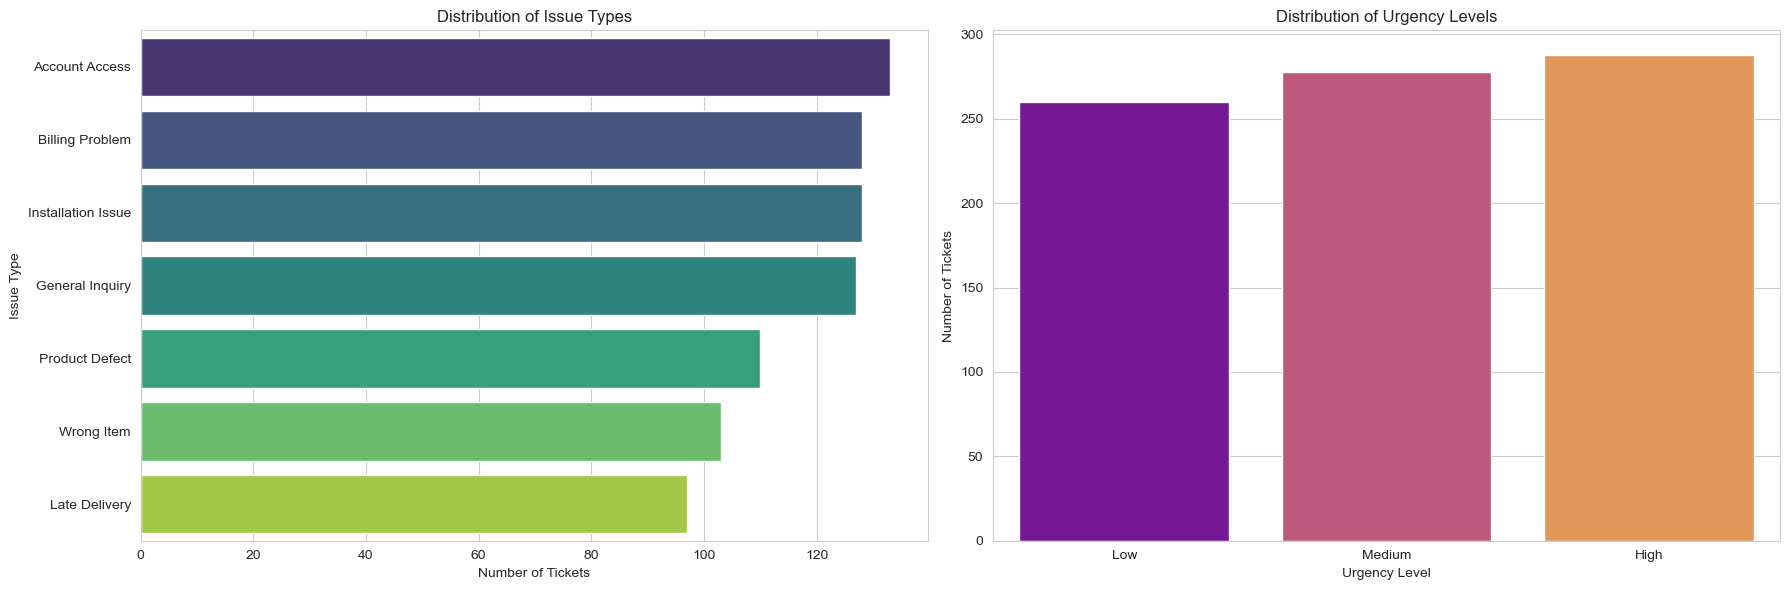

In [4]:
# --- 3. Label Distribution Analysis ---
print("\n--- Analyzing Label Distributions ---")

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# Plot for 'issue_type'
plt.subplot(1, 2, 1)
sns.countplot(y=df['issue_type'], order=df['issue_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Issue Types')
plt.xlabel('Number of Tickets')
plt.ylabel('Issue Type')

# Plot for 'urgency_level'
plt.subplot(1, 2, 2)
sns.countplot(x=df['urgency_level'], order=['Low', 'Medium', 'High'], palette='plasma')
plt.title('Distribution of Urgency Levels')
plt.xlabel('Urgency Level')
plt.ylabel('Number of Tickets')

plt.tight_layout()
plt.show()


--- Analyzing Text Characteristics ---
count    826.000000
mean      77.686441
std       26.811662
min       18.000000
25%       63.000000
50%       71.000000
75%       86.000000
max      174.000000
Name: text_length, dtype: float64


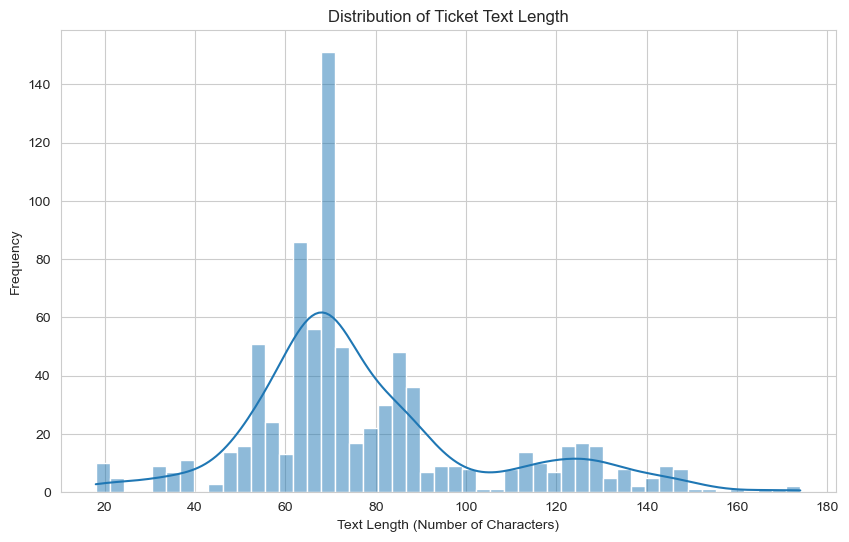

In [5]:
# --- 4. Text Characteristics ---
print("\n--- Analyzing Text Characteristics ---")
df['text_length'] = df['ticket_text'].astype(str).apply(len)
print(df['text_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Ticket Text Length')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()